# Import Libraries

In [95]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from numpy import pi
import sydney_weather_data
import matplotlib

%load_ext autoreload

%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
df = sydney_weather_data.load_data()

In [24]:
df['season']

30176    Summer
30177    Summer
30178    Summer
30179    Summer
30180    Summer
          ...  
33515    Winter
33516    Winter
33517    Winter
33518    Winter
33519    Winter
Name: season, Length: 2710, dtype: category
Categories (4, object): ['Spring', 'Summer', 'Fall', 'Winter']

In [ ]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month
count,2710,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.0,2710.0,2710.000000
mean,2013-01-23 09:39:43.173431552,14.776845,23.021624,3.200221,5.216900,7.296365,27.039852,15.115867,19.316236,67.611070,53.985609,1018.446384,1016.065956,4.158303,4.205535,17.774244,21.551402,0.0,0.0,6.505904
min,2008-02-01 00:00:00,4.300000,11.700000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,19.000000,10.000000,986.700000,990.300000,0.000000,0.000000,6.400000,10.200000,0.0,0.0,1.000000
25%,2010-01-11 06:00:00,11.000000,19.625000,0.000000,3.200000,4.500000,0.000000,11.000000,15.000000,58.000000,43.000000,1013.900000,1011.300000,1.000000,1.000000,13.800000,18.400000,0.0,0.0,4.000000
50%,2013-09-22 12:00:00,14.800000,22.800000,0.000000,4.800000,8.400000,31.000000,15.000000,19.000000,68.000000,55.000000,1018.700000,1016.400000,4.000000,4.000000,18.000000,21.300000,0.0,0.0,7.000000
75%,2015-08-12 18:00:00,18.700000,26.000000,1.200000,7.000000,10.200000,44.000000,20.000000,24.000000,79.000000,64.000000,1023.200000,1020.900000,7.000000,7.000000,21.700000,24.500000,0.0,0.0,9.000000
max,2017-06-25 00:00:00,27.100000,45.800000,119.400000,18.400000,13.600000,96.000000,54.000000,57.000000,100.000000,96.000000,1039.000000,1036.000000,9.000000,8.000000,36.500000,44.700000,0.0,0.0,12.000000
std,NaN,4.544067,4.513887,9.536437,2.788739,3.763332,22.563603,6.917795,7.410547,15.260698,16.271874,6.981884,7.019292,2.750421,2.641529,4.907702,4.303395,0.0,0.0,3.355926


In [ ]:
#[, , , , , , ,  , , , , , ],
#['W', 'WNW', 'SSW', 'S', 'E', 'ESE', 'SSE', 'NNW', 'N', 'WSW', 'SE', 'NNE', 'NW', 'NE', 'ENE', 'SW'],
#['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'SW', '']
wind_direct = ['N','NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW',  'WSW', 'W', 'WNW', 'NW', 'NNW']
wind_direct_labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W',  'NW']

In [ ]:
df_wind_dir_morning = df['WindDir9am'].value_counts().reindex(wind_direct)
df_wind_dir_afternoon = df['WindDir3pm'].value_counts().reindex(wind_direct)

total = sum(df_wind_dir_morning)
df_wind_dir_morning = df_wind_dir_morning/total
df_wind_dir_afternoon = df_wind_dir_afternoon/total
df_wind_dir_morning

WindDir9am
N      0.030996
NNE    0.028782
NE     0.024723
ENE    0.022140
E      0.042435
ESE    0.039483
SE     0.029151
SSE    0.033948
S      0.049077
SSW    0.053506
SW     0.017712
WSW    0.030627
W      0.387085
WNW    0.150923
NW     0.026568
NNW    0.032841
Name: count, dtype: float64

[  0.  45.  90. 135. 180. 225. 270. 315.]


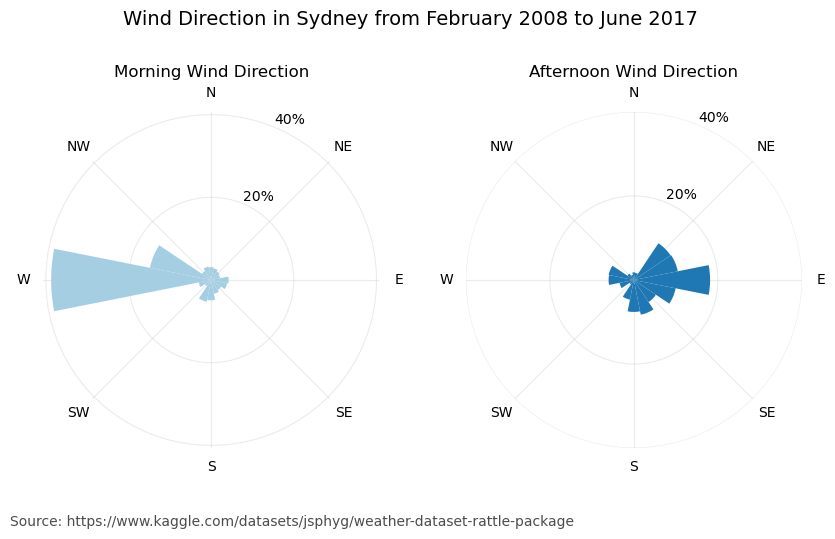

In [49]:
data_list = [df_wind_dir_morning, df_wind_dir_afternoon]
colors = ['#a6cee3', '#1f78b4']
chart_titles = ['Morning Wind Direction', 'Afternoon Wind Direction']

# Base numbers for the graph

# Create a list of angles for the direction labels
angles = np.arange(0,360,360/len(wind_direct_labels))

#Start in the middle of one of the pie pieces so they appear centered
startangle =-22.5/2

fig, ax = plt.subplots(1, 2, figsize=(10, 6), subplot_kw={'projection':'polar'})
for j, data in enumerate(data_list):
    # Loop through every segment
    for i, d in enumerate(data):
        x = (22.5 * pi *2)/ 360
        left = (startangle * pi *2)/ 360 
        startangle += 22.5
        ax[j].barh(0, x, left=left, height=d, align='edge', color = colors[j], zorder=3)
    
    # Set the plot features
    ax[j].spines.clear()
    ax[j].grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=0)
    ax[j].grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=0)
    ax[j].set_theta_offset(.5*pi)
    ax[j].set_theta_direction(-1)
    ax[j].set_thetagrids(angles, labels=wind_direct_labels, fmt=None)
    ax[j].set_title(chart_titles[j])
    ax[j].set_yticks([.2,.4], labels = ['20%', '40%'])
        

plt.subplots_adjust(left=None, bottom=0.25, right=None, top=0.81, wspace=None, hspace=None)
fig.suptitle('Wind Direction in Sydney from February 2008 to June 2017', fontsize=14)
fig.text(x=0.10, y=0.12, s="Source: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)
plt.show()

In [91]:
#df.groupby([]).
#df.groupby(['WindSpeed9am', 'WindSpeed3pm', 'month'])['WindSpeed9am'].mean().unstack('month').reset_index()
windspeed_group_season = df.groupby(['season'], as_index=False, observed=True)[['WindSpeed9am', 'WindSpeed3pm']].median().sort_values('season')
windspeed_group_season

,season,WindSpeed9am,WindSpeed3pm
0,Spring,13.0,20.0
1,Summer,11.0,20.0
2,Fall,15.0,19.0
3,Winter,17.0,17.0


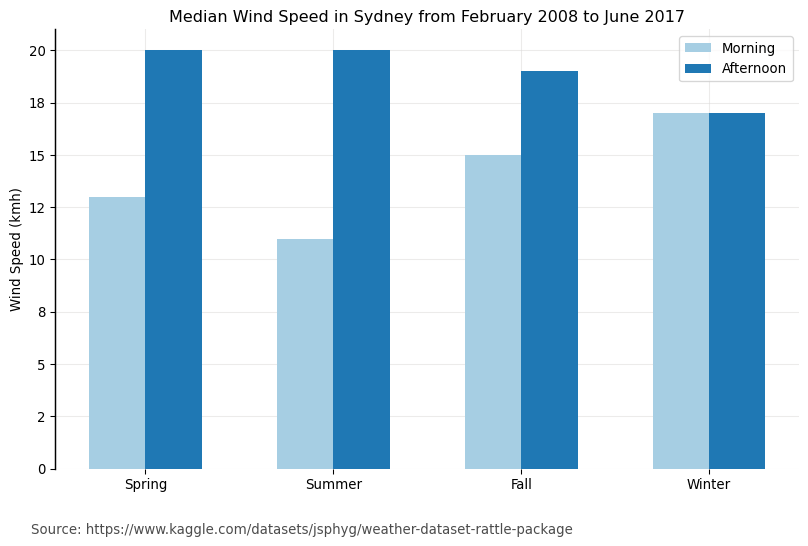

In [98]:
data = windspeed_group_season
x = np.array([1,2,3,4])
bar_width = .3
fig, ax = plt.subplots(figsize=(10,7.5), dpi = 96)
ax.bar(x-bar_width/2, windspeed_group_season['WindSpeed9am'], width=bar_width, align='center', label = 'Morning', color = colors[0], zorder=3)
ax.bar(x+bar_width/2, windspeed_group_season['WindSpeed3pm'], width=bar_width,  align='center', label = 'Afternoon', color = colors[1], zorder=3)
ax.set_xticks(x, labels = windspeed_group_season['season'])
ax.set_title('Median Wind Speed in Sydney from February 2008 to June 2017')
ax.set_ylabel('Wind Speed (kmh)')
ax.text(x=0.10, y=0.15, s="Source: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=0)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=0)
    # Make the left spine thicker
ax.spines[['top','right','bottom']].set_visible(False)
ax.spines['left'].set_linewidth(1.1)
plt.subplots_adjust(left=None, bottom=0.24, right=None, top=0.85, wspace=None, hspace=None)
plt.legend()
plt.show()


,WindSpeed9am,WindSpeed3pm
30186,9.0,26.0
30188,24.0,30.0
30191,11.0,26.0
30197,11.0,28.0
30201,2.0,28.0
...,...,...
33459,13.0,41.0
33494,20.0,28.0
33495,28.0,26.0
33503,19.0,28.0


465 465


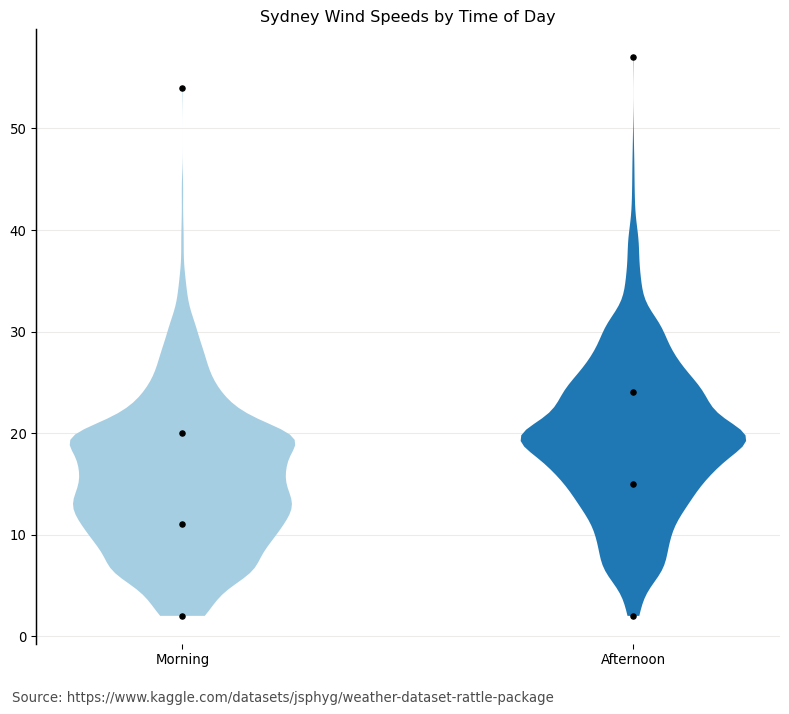

In [237]:
data = df[['WindSpeed9am','WindSpeed3pm']]
min_data, quartile1, medians, quartile3, max_data = np.percentile(data, [0, 25, 50, 75, 100], axis=0)
data_max_9am = data[data['WindSpeed9am'] > quartile3[0]]['WindSpeed9am']
data_max_3pm = data[data['WindSpeed3pm'] > quartile3[1]]['WindSpeed3pm']
max_x_9am = np.full(len(data_max_9am), 1)
max_x_3pm = np.full(1, len(data_max_3pm))
print(len(max_x_9am), len(data_max_9am),)
inds = np.arange(1, len(medians) + 1)

fig, ax = plt.subplots(figsize=(10,10), dpi = 96)
vplot = ax.violinplot(data, showmeans=True, showmedians=True,
        showextrema=False)
for i, pc in enumerate(vplot['bodies']):
    if i == 0:
        pc.set_facecolor(colors[0])
        pc.set_alpha(1)
        pc.set_zorder(3)
        """ ax.scatter(i+1, min_data[i], marker='o', color=colors[1], s=15, zorder=3)
        ax.scatter(i+1, max_data[i], marker='o', color=colors[1], s=15, zorder=3)
        ax.scatter(i+1, quartile1[i], marker='o', color=colors[1], s=15, zorder=3)
        ax.scatter(i+1, quartile3[i], marker='o', color=colors[1], s=15, zorder=3)"""

    else:
        pc.set_facecolor(colors[1])
        pc.set_alpha(1)
        pc.set_zorder(3)
        """ax.scatter(i+1, min_data[i], marker='o', color=colors[0], s=15, zorder=3)
        ax.scatter(i+1, max_data[i], marker='o', color=colors[0], s=15, zorder=3)
        ax.scatter(i+1, quartile1[i], marker='o', color=colors[0], s=15, zorder=3)
        ax.scatter(i+1, quartile3[i], marker='o', color=colors[0], s=15, zorder=3)"""
#vplot['bodies'].set_facecolor('#D43F3A')
ax.spines['left'].set_linewidth(1.1)
ax.spines[['top','right','bottom']].set_visible(False)
ax.set_xticks(inds, labels = ['Morning','Afternoon'])
#ax.scatter(inds, medians, marker='o', color=colors[1], s=30, zorder=3)
ax.scatter(inds, min_data, marker='o', color='black', s=15, zorder=3)
ax.scatter(inds, max_data, marker='o', color='black', s=15, zorder=3)
ax.scatter(inds, quartile1, marker='o', color='black', s=15, zorder=3)
ax.scatter(inds, quartile3, marker='o', color='black', s=15, zorder=3)

plt.subplots_adjust(left=None, bottom=0.21, right=None, top=0.85, wspace=None, hspace=None)
ax.text(x=0.10, y=0.15, s="Source: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)
ax.set_title('Sydney Wind Speeds by Time of Day')
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=0)

plt.show()

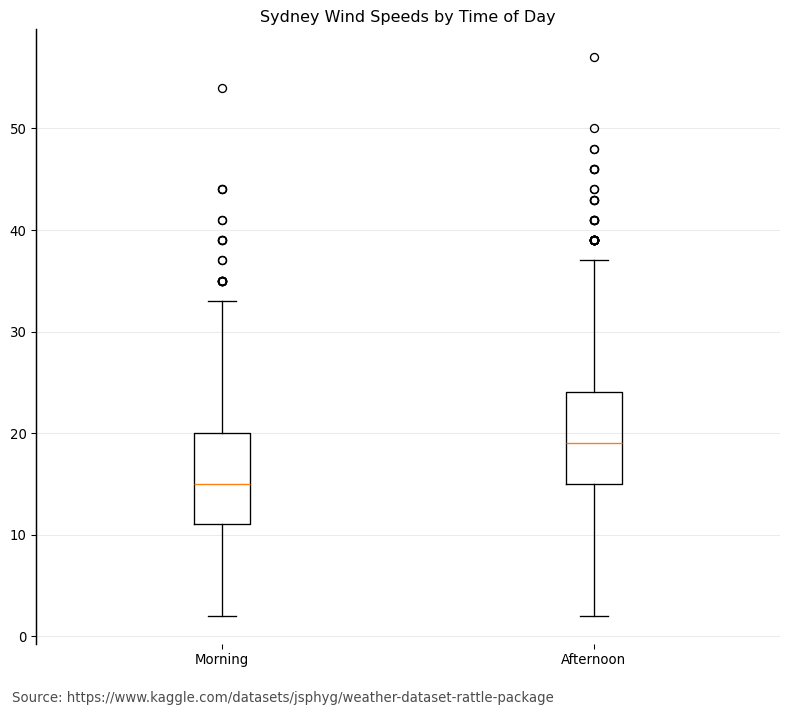

In [190]:
data = df[['WindSpeed9am','WindSpeed3pm']]
min_data, quartile1, medians, quartile3, max_data = np.percentile(data, [0, 25, 50, 75, 100], axis=0)
fig, ax = plt.subplots(figsize=(10,10), dpi = 96)
ax.boxplot(data, labels = ['Morning', 'Afternoon'])
ax.set_title('Sydney Wind Speeds by Time of Day')

plt.subplots_adjust(left=None, bottom=0.21, right=None, top=0.85, wspace=None, hspace=None)
ax.text(x=0.10, y=0.15, s="Source: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)

ax.spines['left'].set_linewidth(1.1)
ax.spines[['top','right','bottom']].set_visible(False)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=0)
plt.show()